<a href="https://colab.research.google.com/github/linejin/ai_study/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title hidden setting code {display-mode: "form"}

#@markdown 이 부분을 실행시켜주세요{display-mode: "form"}

# This document is made by Choi Sejin



# This code will be hidden when the notebook is loaded.
!pip install --upgrade -q gspread


# using for google sheet
"""
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

# Open our new sheet and read some data.
worksheet = gc.open('A new spreadsheet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
pd.DataFrame.from_records(rows)
"""
!git clone https://github.com/linejin/ai_study
print("Cloneing Ready")



Cloning into 'ai_study'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 47 (delta 8), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (47/47), done.
Cloneing Ready


참고자료

https://wikidocs.net/53560

https://developers.google.com/machine-learning/crash-course/descending-into-ml/training-and-loss?hl=ko

# Simple Linear Regression

선형 회귀란 일종의 1차 방정식(직선의 방정식)을 찾는 과정

예시)
1. 키, 몸무게
2. 부모 자식간의 키 유전 관계


### 가설 수립


---

1차 방정식 정의

$$y=Wx+b$$

$$H(x)=Wx+b$$

$x$ : 변인요인의값

$W$ : 가중치(직선의 기울기)

$b$ : 편향($y$절편)

###비용 함수

---

아래 4가지 용어는 모두 가설로 만든 방정식이 본래 값과 얼마나 차이가 나는지를 구하는 함수이다.

비용 함수(cost function) 

손실 함수(loss function)

오차 함수(error function)

목적 함수(objective function)

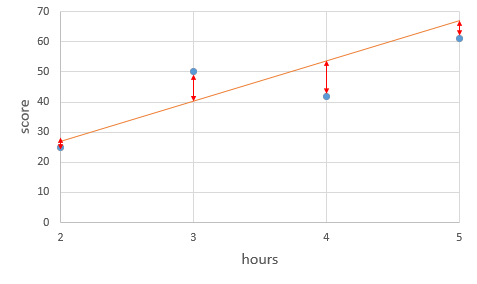

위와 같은 그림의 주황색직선의 방정식에서 $W$와 $b$를 조정하여 각 점과의 오차(빨간색 화살표)가 최소로 되는 $W$와 $b$를 찾는다.

주황색직선의 방정식은 $y=13x+1$으로 오차는 아래와 같다.


|hours(x)|2|3|4|5|
|:-------:|:-------:|:-------:|:-------:|:-------:|
|점의 값|25|50|42|61|
|직선의 값|27|40|53|66|
|오차|-2|10|-7|-5|

이 오차들을 비용 함수에 활용하여 오차가 가장 적은 직선을 찾는다.

#### Mean Absolute Error(MAE)

단순히 오차를 더하기에는 부호가 +와 -가 섞여 있기에 부호를 제거한 후 더한다.

>$\sum_{x=1}^N|y_x - H(x)| = |-2| + |10| + |-7| + |-5|$

그러나 위 식은 오차가 적은 데이터가 추가된다고 할 경우 식을 계산한 값은 오히려 커지기에 오히려 적합하지 않아 보일 수 있다.

이를 해결하기 위해 제곱한 값들의 평균(Mean)을 구해 개수와 상관없는 평균 비용을 계산한다.

>$MAE = \frac{1}{N}\sum_{x=1}^N|y_x - H(x)|$

####Mean Squared Error(MSE)

오차의 크기가 클수록 좋지 않은 가정이다.

오차의 크기를 좀 더 극적으로 키우기 위해 사용하는 방법이 오차(error)값을 제곱하여 사용한다.

>$\sum_{x=1}^N[y_x - H(x)]^2 = (-2)^2 + (10)^2 + (-7)^2 + (-5)^2 = 178$

MAE와 같은 이유로 이 값도 평균(Mean)을 취하여 사용한다.

>$MSE = \frac{1}{N}\sum_{x=1}^N[y_x - H(x)]^2$

일반적으로 사용하는 비용함수 $Cost(W,b)$는 $MSE$를 의미한다.

####Huber loss

MAE와 MSE의 절충안으로 사용한다.

$$Muber = 1 - (\frac{MSE}{VAR(H(x))})$$

###경사 하강법

---

일반적인 Cost(loss)는 아래의 그래프와 같은 형태로 나타난다.

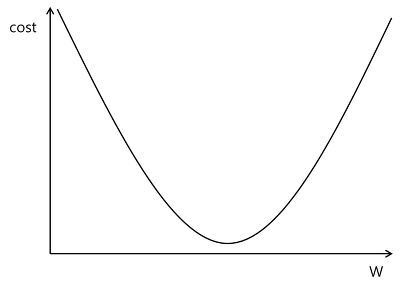

1차 방정식에 해당하는 $y = Wx + b$에서 $W$와 $b$는 Cost가 가장 작은 값을 택해야 한다.
위 그래프에서는 포물선의 가장 아랫부분에 해당하는 곳이 되며 그 부분의 기울기는 0이 된다.

이를 찾기위해 임의적인 $W_0$를 고른다.

해당 위치로부터 cost가 작아지는 방향으로 조금씩 이동해가며 최종적으로 그 기울기가 0인 지점까지 테스트를 해본다.

기울기가 0인 지점으로 수렴하기 위해서는 아래의 식을 이용한다.

>$W_{i+1} := W_i - Gradient$

여기서 기울기가 0이 된다면 $W_{i+1} = W_i$가 된다.  
또한, $Gradient$에 따라 $W$의 이동방향이 바뀐다.

> $Gradient \le 0 \Longrightarrow W_{i+1} \ge W_{i}$  
> $Gradient \ge 0 \Longrightarrow W_{i+1} \le W_{i}$

$Gradient$가 음수인 경우 $W$는 증가해야 하며, $Gradient$가 양수인 경우 $W$가 감소한다.  
따라서 $Gradient$에 $-$를 붙여 부호의 반대로 진행되도록 한다.

$Gradient$에 따라 $W$값이 변하지만, 그 변동량이 너무 작아 시간이 너무 오래 걸릴 수 있거나 그 변동량이 너무 커 오히려 수렴하지 않고 발산할 수 있다.

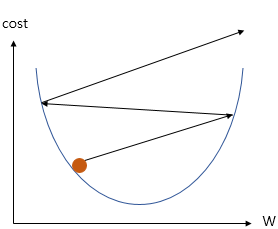

위 그림은 $Gradient$에 따라 $W$가 알맞는 방향으로 움직이지만, 그 변동량이 너무 커 발산하는 경우를 보여준다.  이를 보정해주기 위하여 $\alpha$(Learning Rate)를 $Gradient$를 곱해 사용한다.

$MSE$를 $W$에 대하여 편미분하면 $b$에 대한 $Gradient$도 구할 수 있으므로 $b$도 $W$와 같은 방식으로 갱신한다.

> $W_{i+1} := W_{i} - \alpha\frac{\partial}{\partial W}MSE$  
> $b_{i+1} := b_i - \alpha\frac{\partial}{\partial W}MSE$

#Linear Regression Practice

### 공통 코드

####CSV 호출

In [ ]:
import pandas as pd
from google.colab import files

DATA_SIZE = 200000

data = pd.read_csv('/content/ai_study/testcase/weights_heights.csv')
data = data.dropna().head(DATA_SIZE)
print(data)

         Height    Weight
0      65.78331  112.9925
1      71.51521  136.4873
2      69.39874  153.0269
3      68.21660  142.3354
4      67.78781  144.2971
...         ...       ...
24995  69.50215  118.0312
24996  64.54826  120.1932
24997  64.69855  118.2655
24998  67.52918  132.2682
24999  68.87761  124.8740

[25000 rows x 2 columns]


####Train과 Test DATA 분리

In [ ]:
from sklearn.model_selection import train_test_split

Label_name = "Weight"

X_train, X_test, Y_train, Y_test = train_test_split(data.drop(Label_name, axis = 1),data[Label_name], test_size = 0.2, shuffle = True)

print("--------X_train------", X_train, sep = "\n")
print("--------Y_train------", Y_train, sep = "\n")
print("--------X_test-------", X_test, sep = "\n")
print("--------Y_test-------", Y_test, sep = "\n")

--------X_train------
         Height
15923  68.13785
11001  66.51317
13663  66.73451
13013  65.21454
3308   68.85085
...         ...
19873  68.55679
20531  69.12451
14415  69.26369
11860  67.91694
4796   69.07320

[20000 rows x 1 columns]
--------Y_train------
15923    139.2758
11001    126.2002
13663    114.5210
13013    131.9907
3308     125.6815
           ...   
19873    102.8629
20531    133.6843
14415    129.9973
11860    119.8030
4796     129.8830
Name: Weight, Length: 20000, dtype: float64
--------X_test-------
         Height
2475   66.94316
7188   65.80058
21349  71.83647
15852  65.23296
885    71.40114
...         ...
18445  63.62623
22648  69.72195
9166   67.59916
9358   66.65476
13539  68.00003

[5000 rows x 1 columns]
--------Y_test-------
2475     106.9521
7188     110.1396
21349    140.7706
15852    134.0644
885      153.9993
           ...   
18445    110.8507
22648    118.0798
9166     128.1213
9358     125.3253
13539    137.3120
Name: Weight, Length: 5000, dtype: fl

#### DATA 확인

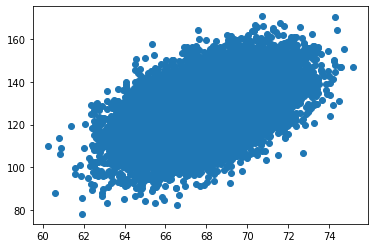

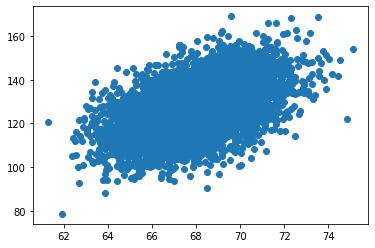

In [ ]:
import matplotlib.pyplot as plt

# train DATA 확인
plt.scatter(X_train, Y_train)
plt.show()

# test DATA 확인
plt.scatter(X_test, Y_test)
plt.show()

###Scikit Learning

In [ ]:
#@title hidden setting code {display-mode: "form"}

#@markdown 공통 코드 부분{display-mode: "form"}

import pandas as pd
from google.colab import files

DATA_SIZE = 200000

data = pd.read_csv('/content/ai_study/testcase/weights_heights.csv')
data = data.dropna().head(DATA_SIZE)

from sklearn.model_selection import train_test_split

Label_name = "Weight"

X_train, X_test, Y_train, Y_test = train_test_split(data.drop(Label_name, axis = 1),data[Label_name], test_size = 0.2, shuffle = True)

####LinearRegression Model 생성

In [ ]:
from sklearn.linear_model import LinearRegression

# Model 생성
lr = LinearRegression()

#### Model 훈련

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 정확도 확인

In [ ]:
lr.score(X_test, Y_test)

0.24925685274045328

#### $W$와 $d$값 확인

In [ ]:
# coef_ : W, intercept_ : d
print(lr.coef_, lr.intercept_)

[3.09588139] -83.42853119108895


#### test DATA로 학습확인

##### X_test의 predict로 그래프화

[123.8195523  120.28226013 138.96865968 ... 125.85045049 122.9267001
 127.09149647]


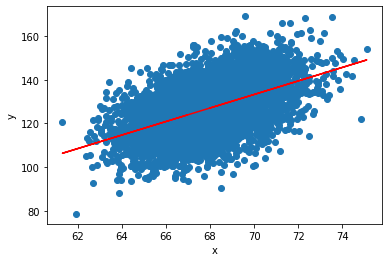

In [ ]:
# X_test의 결과 예측
predictions = lr.predict(X_test)
print(predictions)

# 결과값 그래프화
plt.scatter(X_test, Y_test)
plt.plot(X_test, predictions, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### 1차 방정식을 그래프화

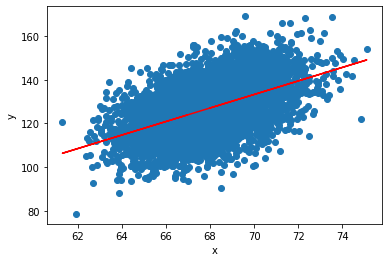

In [ ]:
plt.scatter(X_test, Y_test)
# X * W + d 의 그래프화
plt.plot(X_test, X_test * lr.coef_ + lr.intercept_, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Pytorch

In [ ]:
#@title hidden setting code {display-mode: "form"}

#@markdown 공통 코드 부분{display-mode: "form"}


import pandas as pd
from google.colab import files

DATA_SIZE = 2000

data = pd.read_csv('/content/ai_study/testcase/weights_heights.csv')
data = data.dropna().head(DATA_SIZE)

from sklearn.model_selection import train_test_split

Label_name = "Weight"

X_train, X_test, Y_train, Y_test = train_test_split(data.drop(Label_name, axis = 1),data[Label_name], test_size = 0.2, shuffle = True)

#### Numpy Data를 Tensor화

In [ ]:
import torch
import numpy as np

#numpy의 모든 값을 float64형태로 통일시켜 변환함
X_train = torch.from_numpy(X_train.astype(np.float64).values[:DATA_SIZE])
X_test = torch.from_numpy(X_test.astype(np.float64).values[:DATA_SIZE])
Y_train = torch.from_numpy(Y_train.astype(np.float64).values[:DATA_SIZE])
Y_test = torch.from_numpy(Y_test.astype(np.float64).values[:DATA_SIZE])

#### MSE 확인

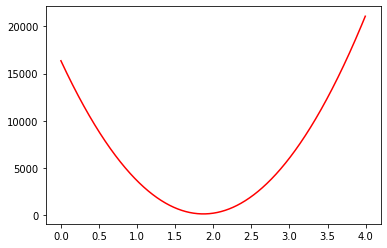

In [ ]:
import matplotlib.pyplot as plt

# W_data : 0 ~ 10사이의 임의적인 W값
# MSE : Cost 값
W_data = []
MSE = []
MSE_Second = []
for i in range(1000):
  # W값 생성 및 W_data에 기록
  W = torch.ones(1) * i /250
  W_data.append(W)
  
  # 가설에 W를 대입하여 계산
  hypothesis = X_train * W
  # Error 계산(MSE) 및 MSE에 기록
  MSE.append(torch.mean((Y_train - hypothesis)**2))

# W에 따른 MSE 출력
plt.plot(W_data, MSE, color = 'red')
plt.show()

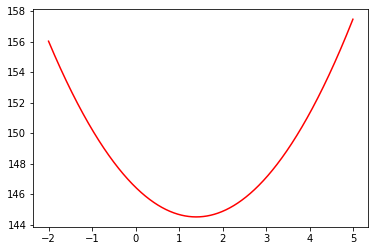

In [ ]:
import matplotlib.pyplot as plt

# MSE : Cost 값
W_data = []
MSE = []
MSE_Second = []
for i in range(1000):
  # W값 생성 및 W_data에 기록
  W = torch.ones(1)*i*0.007 - 2
  W_data.append(W)
  
  # 가설에 W를 대입하여 계산
  hypothesis = X_train * 1.853 + W
  # Error 계산(MSE) 및 MSE에 기록
  MSE.append(torch.mean((Y_train - hypothesis)**2))

# W에 따른 MSE 출력
plt.plot(W_data, MSE, color = 'red')
plt.show()

#### $W$와 $d$ 초기화

In [ ]:
# requires_grad : 학습을 통해 계속 값이 변경되는 값임을 명시
# torch.zeros : 0으로 초기화된 행렬 값 생성
W = torch.ones(1, requires_grad=True) 
b = torch.ones(1, requires_grad=True)

print(W)
print(b)

tensor([1.], requires_grad=True)
tensor([1.], requires_grad=True)


#### 가설 세우기

1차 방정식을 만든다  
$H(x) = Wx + b$

    hypothesis = W * X_train + b

#### 비용 함수 선언

$$MSE = \frac{1}{N}\sum_{x=1}^N[y_x - H(x)]^2$$

    cost = torch.mean((hypothesis - Y_train) ** 2)

#### 경사 하강법 구현

In [ ]:
import torch.optim as optim


# 경사하강법을 SGD 방식으로 진행 optim.SGD(변화시킬 값, lr = learning rate)
optimizer = optim.SGD([W, b], lr=0.0001)

nb_epochs = 10000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산 H(x) = W * X + b <- 1차 방정식 구현
    hypothesis = X_train * W + b

    # cost 계산 <- MSE 계산
    cost = torch.mean((Y_train - hypothesis) ** 2)

    # 전단계에 미분했던 값을 지워 초기화
    optimizer.zero_grad()
    # cost값을 미분
    cost.backward()
    # 미분한 값을 활용해 optimizer의 변수(W, b) 갱신
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/10000 W: 1.793, b: 1.012 Cost: 3538.198784
Epoch  100/10000 W: 1.855, b: 1.015 Cost: 145.861916
Epoch  200/10000 W: 1.855, b: 1.017 Cost: 145.861509
Epoch  300/10000 W: 1.855, b: 1.019 Cost: 145.861103
Epoch  400/10000 W: 1.855, b: 1.021 Cost: 145.860697
Epoch  500/10000 W: 1.855, b: 1.023 Cost: 145.860291
Epoch  600/10000 W: 1.855, b: 1.025 Cost: 145.859884
Epoch  700/10000 W: 1.855, b: 1.027 Cost: 145.859478
Epoch  800/10000 W: 1.855, b: 1.029 Cost: 145.859072
Epoch  900/10000 W: 1.855, b: 1.031 Cost: 145.858666
Epoch 1000/10000 W: 1.855, b: 1.033 Cost: 145.858260
Epoch 1100/10000 W: 1.855, b: 1.035 Cost: 145.857854
Epoch 1200/10000 W: 1.855, b: 1.037 Cost: 145.857447
Epoch 1300/10000 W: 1.855, b: 1.039 Cost: 145.857041
Epoch 1400/10000 W: 1.855, b: 1.041 Cost: 145.856635
Epoch 1500/10000 W: 1.855, b: 1.043 Cost: 145.856229
Epoch 1600/10000 W: 1.855, b: 1.045 Cost: 145.855823
Epoch 1700/10000 W: 1.855, b: 1.047 Cost: 145.855417
Epoch 1800/10000 W: 1.855, b: 1.049 Cost: 145

####Pytorch 전체 코드

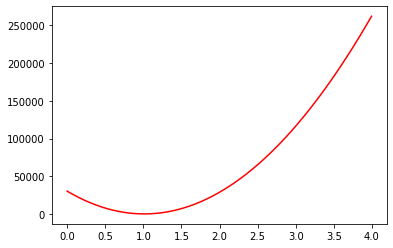

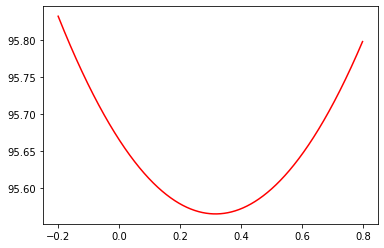

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)
Epoch    0/1000 W: 0.02979, b: 0.00017 Cost: 30249.982887
Epoch  100/1000 W: 0.96265, b: 0.00564 Cost: 172.317694
Epoch  200/1000 W: 1.00968, b: 0.00594 Cost: 95.855946
Epoch  300/1000 W: 1.01205, b: 0.00598 Cost: 95.661575
Epoch  400/1000 W: 1.01217, b: 0.00601 Cost: 95.661066
Epoch  500/1000 W: 1.01218, b: 0.00604 Cost: 95.661049
Epoch  600/1000 W: 1.01218, b: 0.00606 Cost: 95.661033
Epoch  700/1000 W: 1.01218, b: 0.00609 Cost: 95.661018
Epoch  800/1000 W: 1.01218, b: 0.00612 Cost: 95.661002
Epoch  900/1000 W: 1.01218, b: 0.00615 Cost: 95.660986
Epoch 1000/1000 W: 1.01218, b: 0.00618 Cost: 95.660970


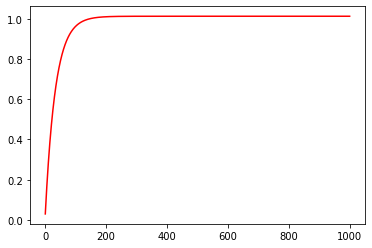

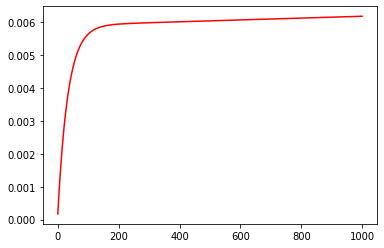

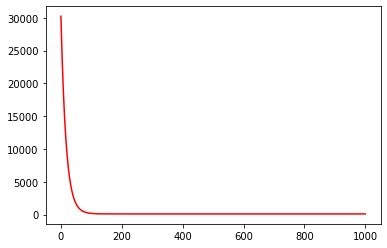

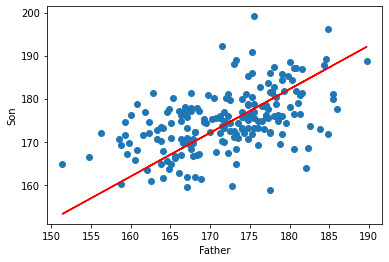

In [23]:
import pandas as pd
from google.colab import files

DATA_SIZE = 1000

data = pd.read_csv('/content/ai_study/testcase/Pearson.csv')
data = data.dropna().head(DATA_SIZE)

from sklearn.model_selection import train_test_split

Label_name = "Son"

X_train, X_test, Y_train, Y_test = train_test_split(data.drop(Label_name, axis = 1),data[Label_name], test_size = 0.2, shuffle = True)

import torch
import numpy as np

X_train = torch.from_numpy(X_train.astype(np.float64).values[:DATA_SIZE])
X_test = torch.from_numpy(X_test.astype(np.float64).values[:DATA_SIZE])
Y_train = torch.from_numpy(Y_train.astype(np.float64).values[:DATA_SIZE])
Y_test = torch.from_numpy(Y_test.astype(np.float64).values[:DATA_SIZE])

import matplotlib.pyplot as plt
# W_data : 0 ~ 10사이의 임의적인 W값
# MSE : Cost 값
W_data = []
MSE = []
for i in range(1000):
  # W값 생성 및 W_data에 기록
  W = torch.ones(1) * i /250
  W_data.append(W)
  
  # 가설에 W를 대입하여 계산
  hypothesis = X_train * W
  # Error 계산(MSE) 및 MSE에 기록
  MSE.append(torch.mean((Y_train - hypothesis)**2))
# W에 따른 MSE 출력
plt.plot(W_data, MSE, color = 'red')
plt.show()

# MSE : Cost 값
W_data = []
MSE = []
for i in range(1000):
  # W값 생성 및 W_data에 기록
  W = torch.ones(1)*i*0.001 - 0.2
  W_data.append(W)
  
  # 가설에 W를 대입하여 계산
  hypothesis = X_train * 1.012 + W
  # Error 계산(MSE) 및 MSE에 기록
  MSE.append(torch.mean((Y_train - hypothesis)**2))
# W에 따른 MSE 출력
plt.plot(W_data, MSE, color = 'red')
plt.show()

# requires_grad : 학습을 통해 계속 값이 변경되는 값임을 명시
# torch.zeros : 0으로 초기화된 행렬 값 생성
W = torch.zeros(1, requires_grad=True) 
b = torch.zeros(1, requires_grad=True)

print(W)
print(b)

import torch.optim as optim


# 경사하강법을 SGD 방식으로 진행 optim.SGD(변화시킬 값, lr = learning rate)
optimizer = optim.SGD([W, b], lr=0.0000005)

epoch_list = []
W_list = []
b_list = []
cost_list = []

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산 H(x) = W * X + b <- 1차 방정식 구현
    hypothesis = X_train * W + b

    # cost 계산 <- MSE 계산
    cost = torch.mean((Y_train - hypothesis) ** 2)

    # 전단계에 미분했던 값을 지워 초기화
    optimizer.zero_grad()
    # cost값을 미분
    cost.backward()
    # 미분한 값을 활용해 optimizer의 변수(W, b) 갱신
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.5f}, b: {:.5f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))
    epoch_list.append(epoch)
    W_list.append(W.item())
    b_list.append(b.item())
    cost_list.append(cost.item())


plt.plot(epoch_list, W_list, color = 'red')
plt.show()
plt.plot(epoch_list, b_list, color = 'red')
plt.show()
plt.plot(epoch_list, cost_list, color = 'red')
plt.show()

plt.scatter(X_test, Y_test)
# X * W + d 의 그래프화
plt.plot(X_test, X_test * W.item() + b.item(), 'r')
plt.xlabel('Father')
plt.ylabel('Son')
plt.show()